In [10]:
import os
os.getcwd()
os.chdir("C:\\Users\\arora\\Interview")

In [946]:
import pandas as pd 
performance=pd.read_csv("PerformanceReview.csv")
performance.head()

,EmployeeId,ReviewDate,PerformanceRating
0,1001,12/14/2015,3
1,1001,12/13/2016,3
2,1001,12/13/2017,3
3,1001,12/13/2018,3
4,1001,12/13/2019,3


##### Convert the performance review data into avg ratings for each employee id

In [947]:
performance_rating=performance.groupby("EmployeeId").mean()
print(performance_avg.shape)
performance_avg.head()

(1632, 1)


,PerformanceRating
EmployeeId,
1001,3.0
1002,3.5
1003,3.0
1004,3.6
1005,3.0


In [948]:
employee=pd.read_csv("Employee.csv")
employee.shape
employee.head()

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,EmploymentEndDate,EmploymentEndReason,EmploymentStartDate,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth
0,1001,10,Master,Business,Accounting,NaN,NaN,12/12/2014,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980
1,1002,7,Master,Other,Other,NaN,NaN,10/10/2017,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986
2,1003,9,Bachelor,Business,Other,3/8/2019,Retired,7/23/2014,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1992
3,1004,8,Master,Other,Marketing,NaN,NaN,5/8/2014,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979
4,1005,7,Master,Computer Science,Marketing,NaN,NaN,12/24/2013,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979


##### Since the dataset employee doesn't have the target variable, we need to create a variable 'Attrition'. If there is a data point for EndEmployment Date, assing 1 else 0

In [949]:
import math
employee['Attrition'] = ['0' if((isinstance(x, float) and math.isnan(x))) else '1' for x in employee['EmploymentEndDate']] 
employee.head()
#Here Nan is float so we need to check using isintance if its float and Nan

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,EmploymentEndDate,EmploymentEndReason,EmploymentStartDate,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth,Attrition
0,1001,10,Master,Business,Accounting,NaN,NaN,12/12/2014,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980,0
1,1002,7,Master,Other,Other,NaN,NaN,10/10/2017,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986,0
2,1003,9,Bachelor,Business,Other,3/8/2019,Retired,7/23/2014,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1992,1
3,1004,8,Master,Other,Marketing,NaN,NaN,5/8/2014,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979,0
4,1005,7,Master,Computer Science,Marketing,NaN,NaN,12/24/2013,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979,0


##### Newly created variable 'Attrition' has data type as object. Convert it to integer so that there is no mismatch

In [950]:
employee['Attrition'] = [int(i) for i in employee['Attrition']]

##### Merge the performance and employee data using EmployeeId as the key

In [952]:
employee_rating=employee.merge(performance_avg, on="EmployeeId", how="left")
employee_rating.head()

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,EmploymentEndDate,EmploymentEndReason,EmploymentStartDate,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth,Attrition,PerformanceRating
0,1001,10,Master,Business,Accounting,NaN,NaN,12/12/2014,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980,0,3.0
1,1002,7,Master,Other,Other,NaN,NaN,10/10/2017,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986,0,3.5
2,1003,9,Bachelor,Business,Other,3/8/2019,Retired,7/23/2014,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1992,1,3.0
3,1004,8,Master,Other,Marketing,NaN,NaN,5/8/2014,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979,0,3.6
4,1005,7,Master,Computer Science,Marketing,NaN,NaN,12/24/2013,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979,0,3.0


##### Calcualate the age of the emplyee using their Birth Year

In [953]:
employee_rating['Age']=2020-employee_rating['YearOfBirth']
employee_rating.head()

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,EmploymentEndDate,EmploymentEndReason,EmploymentStartDate,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth,Attrition,PerformanceRating,Age
0,1001,10,Master,Business,Accounting,NaN,NaN,12/12/2014,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980,0,3.0,40
1,1002,7,Master,Other,Other,NaN,NaN,10/10/2017,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986,0,3.5,34
2,1003,9,Bachelor,Business,Other,3/8/2019,Retired,7/23/2014,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1992,1,3.0,28
3,1004,8,Master,Other,Marketing,NaN,NaN,5/8/2014,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979,0,3.6,41
4,1005,7,Master,Computer Science,Marketing,NaN,NaN,12/24/2013,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979,0,3.0,41


In [954]:
employee_rating.head()

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,EmploymentEndDate,EmploymentEndReason,EmploymentStartDate,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth,Attrition,PerformanceRating,Age
0,1001,10,Master,Business,Accounting,NaN,NaN,12/12/2014,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980,0,3.0,40
1,1002,7,Master,Other,Other,NaN,NaN,10/10/2017,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986,0,3.5,34
2,1003,9,Bachelor,Business,Other,3/8/2019,Retired,7/23/2014,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1992,1,3.0,28
3,1004,8,Master,Other,Marketing,NaN,NaN,5/8/2014,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979,0,3.6,41
4,1005,7,Master,Computer Science,Marketing,NaN,NaN,12/24/2013,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979,0,3.0,41


##### Drop the Year of Birth as we don't need it anymore

In [955]:
employee_rating.drop(['YearOfBirth'],axis=1)

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,EmploymentEndDate,EmploymentEndReason,EmploymentStartDate,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,Attrition,PerformanceRating,Age
0,1001,10,Master,Business,Accounting,NaN,NaN,12/12/2014,Female,4,Married,2.0,13,1,2,96800,0,None,40,0,3.000000,40
1,1002,7,Master,Other,Other,NaN,NaN,10/10/2017,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,0,3.500000,34
2,1003,9,Bachelor,Business,Other,3/8/2019,Retired,7/23/2014,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1,3.000000,28
3,1004,8,Master,Other,Marketing,NaN,NaN,5/8/2014,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,0,3.600000,41
4,1005,7,Master,Computer Science,Marketing,NaN,NaN,12/24/2013,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,0,3.000000,41
5,1006,9,Bachelor,Marketing,Other,NaN,NaN,3/17/2015,Male,2,Married,5.0,28,3,8,96900,1,Monthly,40,0,4.000000,51
6,1007,8,Bachelor,Business,Other,NaN,NaN,11/25/2011,Female,2,Single,1.0,21,5,22,78800,1,None,40,0,3.375000,46
7,1008,14,Bachelor,Business,Sales,6/21/2019,Fired,10/3/2013,Female,2,Married,2.0,24,1,3,49200,1,None,40,1,3.400000,47
8,1009,15,Master,Business,Other,3/15/2019,Retired,1/10/2019,Female,3,Married,NaN,1,1,4,48000,1,Weekly,40,1,NaN,26
9,1010,7,Master,Business,Other,10/2/2019,Went to another company,6/18/2015,Male,1,Married,1.0,10,8,13,51700,4,Weekly,40,1,2.500000,32


In [915]:
# See all the colums names after merging the two files
for col in employee_rating.columns: 
    print(col) 

EmployeeId
CommuteDistance
DegreeCompleted
DegreeField
Department
EmploymentEndDate
EmploymentEndReason
EmploymentStartDate
Gender
JobLevel
MaritalStatus
NumPreviousCompanies
NumYearsWorked
OvertimeDays
OvertimeHours
Salary
TrainingsAttended
TravelFrequency
WeeklyHoursBudgeted
YearOfBirth
Attrition
PerformanceRating
Age


### Exploratory Data Analysis

##### Calculate the percentage of the missing data in each column. Based on this, decide which columns should be dropped

In [916]:
percent_missing = (employee_rating.isnull().sum() * 100 / len(employee_rating)).to_frame()
percent_missing.columns=['Percent_missing']
percent_missing.sort_values("Percent_missing", ascending=False)

,Percent_missing
EmploymentEndDate,63.968016
EmploymentEndReason,63.968016
PerformanceRating,18.440780
NumPreviousCompanies,9.295352
MaritalStatus,3.398301
DegreeField,1.149425
OvertimeHours,0.000000
Attrition,0.000000
YearOfBirth,0.000000
WeeklyHoursBudgeted,0.000000


##### Visually understand which of the variables have missing data points

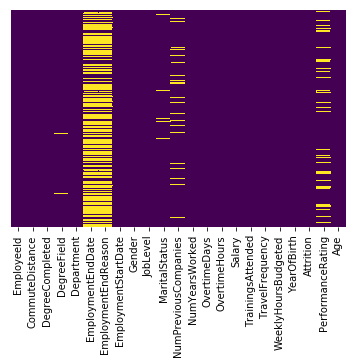

In [22]:
#Visual representation of missing values in each variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(employee_rating.isnull(),yticklabels=False,cbar=False, cmap='viridis')

##### Based on the above plot and percentages, remove columns EmploymentEndDate and EmploymentEndReason as there is huge percentage of data missing. Also, EmploymentStartDate is of no use, so we can drop it.
##### However, Number of previous years of exp, no of previous companies and performace ratings are imp so shoudnt be removed

In [956]:
 employee_rating1=employee_rating.drop(['EmploymentEndDate','EmploymentEndReason', 'EmploymentStartDate'], axis=1)
employee_rating1.head()

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth,Attrition,PerformanceRating,Age
0,1001,10,Master,Business,Accounting,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980,0,3.0,40
1,1002,7,Master,Other,Other,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986,0,3.5,34
2,1003,9,Bachelor,Business,Other,Male,2,Married,NaN,5,4,15,49100,2,No travel,40,1992,1,3.0,28
3,1004,8,Master,Other,Marketing,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979,0,3.6,41
4,1005,7,Master,Computer Science,Marketing,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979,0,3.0,41


##### Lets check how many data points are missing in each of these columns mentioned below

In [957]:
print("Number of Previous Companies "+ str(employee_rating1[employee_rating1.NumPreviousCompanies.isnull()].shape))
print(employee_rating1[employee_rating1.DegreeField.isnull()].shape)
print(employee_rating1[employee_rating1.MaritalStatus.isnull()].shape)
print(employee_rating1[employee_rating1.PerformanceRating.isnull()].shape)
print(employee_rating1.shape)

Number of Previous Companies (186, 20)
(23, 20)
(68, 20)
(369, 20)
(2001, 20)


In [958]:
employee_rating1.dropna(subset=['DegreeField','MaritalStatus']).shape

(1910, 20)

In [959]:
employee_rating1['NumPreviousCompanies'].value_counts(dropna=False) #Dropna will also show how many missing values

 1.0     528
 2.0     465
 0.0     290
 3.0     273
NaN      186
 4.0     122
 5.0      67
 6.0      34
 7.0      21
 8.0       7
 10.0      4
 9.0       4
Name: NumPreviousCompanies, dtype: int64

In [960]:
employee_rating1['DegreeField'].value_counts(dropna=False)

Other               494
Business            385
Marketing           364
Finance             312
Computer Science    197
Life Sciences       117
Technical Degree    109
NaN                  23
Name: DegreeField, dtype: int64

In [961]:
employee_rating1['MaritalStatus'].value_counts(dropna=False)

Married     1007
Single       729
Divorced     197
NaN           68
Name: MaritalStatus, dtype: int64

##### Compute the mean and median for data imputation

In [962]:
print("Mean of Performance rating is " + str(employee_rating1['PerformanceRating'].mean()))
print("Median of Number of previous companies " + str(employee_rating1['NumPreviousCompanies'].median()))

Mean of Performance rating is 3.2966125386211993
Median of Number of previous companies 2.0


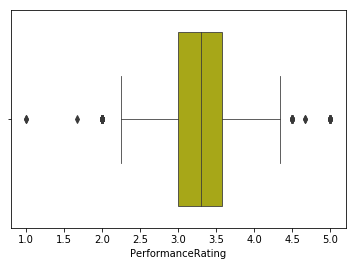

In [963]:
sns.boxplot(x=employee_rating1['PerformanceRating'], color='y', linewidth=0.8)
#Below plot shows that the average rating is between 3 and 3.5 

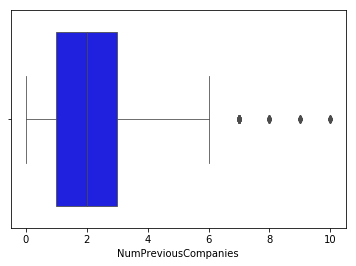

In [1122]:
sns.boxplot(x=employee_rating1['NumPreviousCompanies'],  color='b', linewidth=0.8)
#Below plot shows the median is 2 

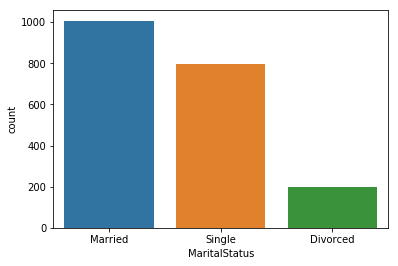

In [900]:
sns.countplot( x='MaritalStatus', data=employee_rating1)

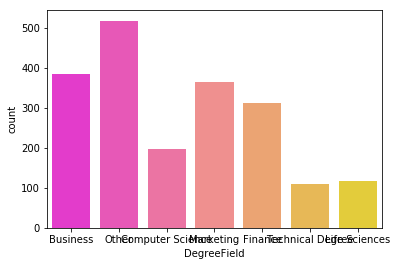

In [1118]:
sns.countplot( x='DegreeField', data=employee_rating1, palette='spring')

#####  Replace/Impute the missing values of Performance rating with their average values and Number of previous companies with their median value. 
##### As seen from above plots, DegreeField have majority of their values as 'Other' and MaritalStatus have majority of their values as 'Married'

In [964]:
employee_rating1['PerformanceRating'].fillna(value=3.3,inplace=True)
employee_rating1['NumPreviousCompanies'].fillna(value=2,inplace=True)
employee_rating1['DegreeField'].fillna(value='Other', inplace=True)
employee_rating1['MaritalStatus'].fillna(value='Married', inplace=True)

In [965]:
employee_rating1.head()

,EmployeeId,CommuteDistance,DegreeCompleted,DegreeField,Department,Gender,JobLevel,MaritalStatus,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,TravelFrequency,WeeklyHoursBudgeted,YearOfBirth,Attrition,PerformanceRating,Age
0,1001,10,Master,Business,Accounting,Female,4,Married,2.0,13,1,2,96800,0,None,40,1980,0,3.0,40
1,1002,7,Master,Other,Other,Female,2,Single,2.0,12,1,5,60400,1,Monthly,40,1986,0,3.5,34
2,1003,9,Bachelor,Business,Other,Male,2,Married,2.0,5,4,15,49100,2,No travel,40,1992,1,3.0,28
3,1004,8,Master,Other,Marketing,Male,2,Single,1.0,15,1,3,47100,0,No travel,40,1979,0,3.6,41
4,1005,7,Master,Computer Science,Marketing,Male,4,Single,2.0,16,4,12,58700,1,Monthly,40,1979,0,3.0,41


In [966]:
survey=pd.read_csv("Survey.csv")
survey.head()

,EmployeeId,QuestionNum,QuestionText,Response
0,1001,Q1,How satisfied are you with your job?,Very Satisfied
1,1001,Q2,How satisfied are you with the company?,Neither Satisfied nor Unsatisfied
2,1001,Q3,How satisfied are you with your manager?,Somewhat Satisfied
3,1001,Q4,How would you rate you work/life balance?,Excellent
4,1002,Q1,How satisfied are you with your job?,Very Satisfied


##### Convert each of the survey questions as single feature for each of the employees

In [967]:
Trans= survey.groupby('EmployeeId').Response.apply(list)
survey1=pd.DataFrame(Trans.tolist(), index=Trans.index)
survey1.columns=["Job" , "Company", "Manager","Work/Life balance"]
survey1.head()

,Job,Company,Manager,Work/Life balance
EmployeeId,,,,
1001,Very Satisfied,Neither Satisfied nor Unsatisfied,Somewhat Satisfied,Excellent
1002,Very Satisfied,Somewhat Satisfied,Very Satisfied,Excellent
1006,Neither Satisfied nor Unsatisfied,Very Unsatisfied,Somewhat Unsatisfied,Very Poor
1007,Very Unsatisfied,Very Unsatisfied,Somewhat Unsatisfied,Very Poor
1008,Very Satisfied,Very Satisfied,Very Satisfied,Good


##### Since each survey question/feature are ordinal value and their values have rank importance, so convert these into ordianl values

In [968]:
#Creating the order for Satisfaction levels
ordered_satisfaction=['Very Poor','Poor','Very Unsatisfied','Somewhat Unsatisfied','Neither Satisfied nor Unsatisfied',
                     'Somewhat Satisfied','Very Satisfied','Fair','Good','Excellent']

In [969]:
#Converting to ordinal categorical data with 0 as Very Poor and 10 as Excellent
survey1['Job']=survey1['Job'].astype("category",
  ordered=True,
  categories=ordered_satisfaction
).cat.codes

survey1['Company']=survey1['Company'].astype("category",
  ordered=True,
  categories=ordered_satisfaction
).cat.codes

survey1['Manager']=survey1['Manager'].astype("category",
  ordered=True,
  categories=ordered_satisfaction
).cat.codes

survey1['Work/Life balance']=survey1['Work/Life balance'].astype("category",
  ordered=True,
  categories=ordered_satisfaction
).cat.codes



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [970]:
survey1=survey1.reset_index()
survey1.head()
#pd.to_csv('Try.csv')

,EmployeeId,Job,Company,Manager,Work/Life balance
0,1001,6,4,5,9
1,1002,6,5,6,9
2,1006,4,2,3,0
3,1007,2,2,3,0
4,1008,6,6,6,8


In [971]:
survey2=pd.read_csv("Try.csv")
survey2.head()

,EmployeeId,Job,Company,Manager,Work/Life balance
0,1001,6,4,5,9
1,1002,6,5,6,9
2,1006,4,2,3,0
3,1007,2,2,3,0
4,1008,6,6,6,8


##### Finally, merge the survey and employee_rating( employee+performance) dataset using EmployeeId as their key

In [972]:
#employee_rating=pd.concat([employee,performance_avg], axis=1)
employee_rating2=employee_rating1.merge(survey2, on="EmployeeId", how="left")
employee_rating2.head(10)
employee_rating2.dtypes

EmployeeId                int64
CommuteDistance           int64
DegreeCompleted          object
DegreeField              object
Department               object
Gender                   object
JobLevel                  int64
MaritalStatus            object
NumPreviousCompanies    float64
NumYearsWorked            int64
OvertimeDays              int64
OvertimeHours             int64
Salary                    int64
TrainingsAttended         int64
TravelFrequency          object
WeeklyHoursBudgeted       int64
YearOfBirth               int64
Attrition                 int64
PerformanceRating       float64
Age                       int64
Job                       int64
Company                   int64
Manager                   int64
Work/Life balance         int64
dtype: object

##### Convert categorical variables into dummies 

In [973]:
employee_rating2=pd.get_dummies(employee_rating2, columns=['MaritalStatus',
                                                           'Department',
                                                           'DegreeCompleted',
                                                           'DegreeField',
                                                           'Gender',
                                                           'TravelFrequency'])

##### Treat multicollinearity

In [935]:
employee_Col=employee_rating2.drop(['EmployeeId','Attrition'], axis=1)

In [478]:
corr = employee_Col.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


##### Bases on the above correlation plot, remove the highly correlated variables Age , NumYearsWorked, Birth year, OvertimeDays, Manager.
##### Also, WeeklyHoursBudgeted has constant value of 40 so this doesn,t add any varition for our model and can be removed.

In [974]:
employee_rating2=employee_rating2.drop(['WeeklyHoursBudgeted','Age', 'NumYearsWorked','OvertimeDays','Manager'],
                                       axis=1)

##### Again check multicollinearity to see if multicollinearity exisits

In [938]:
employee_col=employee_Col.drop(['WeeklyHoursBudgeted','Age', 'NumYearsWorked','YearOfBirth','OvertimeDays','Manager'],axis=1)

In [493]:
corr = employee_col.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(1)

In [495]:
employee_rating2.dtypes

EmployeeId                             int64
CommuteDistance                        int64
JobLevel                               int64
NumPreviousCompanies                 float64
OvertimeHours                          int64
Salary                                 int64
TrainingsAttended                      int64
Attrition                              int64
PerformanceRating                    float64
Job                                    int64
Company                                int64
Work/Life balance                      int64
MaritalStatus_Divorced                 uint8
MaritalStatus_Married                  uint8
MaritalStatus_Single                   uint8
Department_Accounting                  uint8
Department_Human Resources             uint8
Department_Information Technology      uint8
Department_Marketing                   uint8
Department_Other                       uint8
Department_Sales                       uint8
DegreeCompleted_Associate              uint8
DegreeComp

In [975]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [976]:
employee_final=employee_rating2
employee_final.head()
employee_final.dtypes

EmployeeId                             int64
CommuteDistance                        int64
JobLevel                               int64
NumPreviousCompanies                 float64
OvertimeHours                          int64
Salary                                 int64
TrainingsAttended                      int64
YearOfBirth                            int64
Attrition                              int64
PerformanceRating                    float64
Job                                    int64
Company                                int64
Work/Life balance                      int64
MaritalStatus_Divorced                 uint8
MaritalStatus_Married                  uint8
MaritalStatus_Single                   uint8
Department_Accounting                  uint8
Department_Human Resources             uint8
Department_Information Technology      uint8
Department_Marketing                   uint8
Department_Other                       uint8
Department_Sales                       uint8
DegreeComp

##### Drop Variable EmployeeId as its not required for training the model

In [977]:
employee_final=employee_final.drop(['EmployeeId'], axis=1)


##### Finally, double check if there is any missing value in our final dataset 

In [498]:
percent_missing1 = (employee_final.isnull().sum() * 100 / len(employee_final)).to_frame()
percent_missing1.columns=['Percent_missing']
percent_missing1.sort_values("Percent_missing", ascending=False)

,Percent_missing
CommuteDistance,0.0
DegreeField_Technical Degree,0.0
DegreeCompleted_Doctor,0.0
DegreeCompleted_Master,0.0
DegreeField_Business,0.0
DegreeField_Computer Science,0.0
DegreeField_Finance,0.0
DegreeField_Life Sciences,0.0
DegreeField_Marketing,0.0
DegreeField_Other,0.0


### Random Forest

#### Scaling the data and converting into train and test

In [1013]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x=employee_final.drop(['Attrition'], axis=1)
y=employee_final['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.7,test_size=0.3, random_state=0)

scaler=MinMaxScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [1112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=30, max_depth=29, n_estimators=21).fit(x_train_scaled, y_train.values.ravel())
y_pred=rf.predict(x_test_scaled)

In [1031]:
rf_prob=pd.DataFrame(rf.predict_proba(x_test_scaled))
rf_prob.columns=['Attrition No', 'Attrition Yes'] #save the probabilities

### Evaluation Metrics

In [1113]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5901044724995107

In [1114]:
print(rf.score(x_train_scaled,y_train))
print(rf.score(x_test_scaled,y_test))

0.9978571428571429
0.64891846921797


In [1115]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

print('Random Forest Confusion Matrix\n', confusion)

print("\n\nClassification Report")
print(classification_report(y_test, y_pred))

Random Forest Confusion Matrix
 [[307  86]
 [125  83]]


Classification Report
             precision    recall  f1-score   support

          0       0.71      0.78      0.74       393
          1       0.49      0.40      0.44       208

avg / total       0.63      0.65      0.64       601



## Tuning model

### Tuning the total number of trees

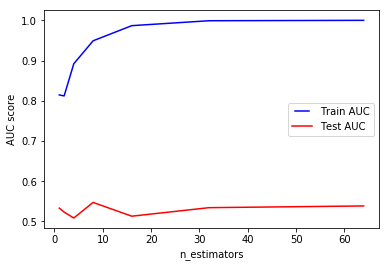

In [1098]:
n_estimators = [1, 2, 4, 8, 16, 32,64]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

### Tuning the max_depth

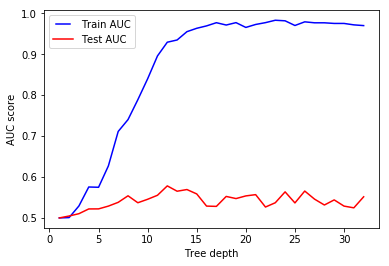

In [1008]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train_scaled, y_train)
   train_pred = rf.predict(x_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

### Tuning Max no of features for each split

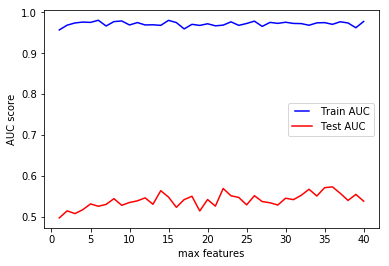

In [509]:
max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

##### Random Foresrt - Feature Importance

In [1019]:
import pandas as pd

# Extract feature importances
feature_imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
feature_imp.head(10)

,feature,importance
4,Salary,0.092389
6,YearOfBirth,0.091746
3,OvertimeHours,0.082377
0,CommuteDistance,0.078262
7,PerformanceRating,0.075070
2,NumPreviousCompanies,0.066930
5,TrainingsAttended,0.040903
10,Work/Life balance,0.037512
8,Job,0.037309
9,Company,0.036804


##### AUC - Area under curve 

In [1020]:
from sklearn.metrics import roc_auc_score
r_probs=[0 for _ in range(len(y_test))]  # for the baseline model, all cases wrong
r_fpr, r_tpr,_=roc_curve(y_test,r_probs)
r_auc=roc_auc_score(y_test, r_probs)

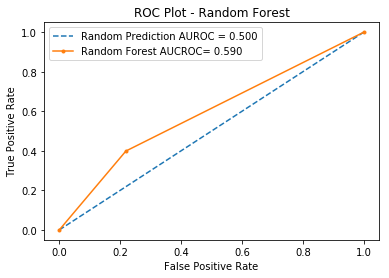

In [1116]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction AUROC = %0.3f'  %r_auc)
plt.plot(false_positive_rate, true_positive_rate, marker='.', label='Random Forest AUCROC= %0.3f'%roc_auc)
plt.title("ROC Plot - Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# For the worst case scenario the AUC is 0.5

In [ ]:
print("Classification Report")
print(classification_report(y_test, predictions))

### Support Vector Machines

In [762]:
#When features are less than the records and records are not too much, use gaussian kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', C=40)
svclassifier.fit(x_train_scaled, y_train)

SVC(C=40, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [763]:
y_pred = svclassifier.predict(x_test_scaled)

In [764]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[353  40]
 [174  34]]
             precision    recall  f1-score   support

          0       0.67      0.90      0.77       393
          1       0.46      0.16      0.24       208

avg / total       0.60      0.64      0.59       601



In [765]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.530840183989039

### Gradient Boosting Trees

##### Finding the best learning rate

In [735]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=20, max_depth=5, random_state=0).fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.722
Accuracy score (test): 0.669
Learning rate:  0.075
Accuracy score (training): 0.771
Accuracy score (test): 0.674
Learning rate:  0.1
Accuracy score (training): 0.797
Accuracy score (test): 0.644
Learning rate:  0.25
Accuracy score (training): 0.871
Accuracy score (test): 0.642
Learning rate:  0.5
Accuracy score (training): 0.920
Accuracy score (test): 0.636
Learning rate:  0.75
Accuracy score (training): 0.954
Accuracy score (test): 0.586
Learning rate:  1
Accuracy score (training): 0.968
Accuracy score (test): 0.611


##### Tuning the parameter for the number of trees

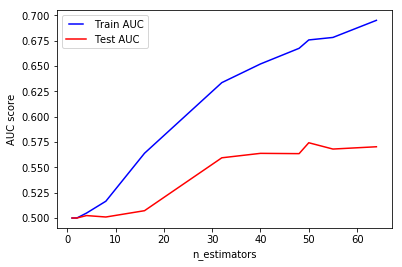

In [648]:
n_estimators = [1, 2, 4, 8, 16, 32,40,48,50,55,64]
train_results = []
test_results = []
for estimator in n_estimators:
   gb = GradientBoostingClassifier(n_estimators=estimator).fit(x_train_scaled, y_train)
   train_pred = gb.predict(x_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = gb.predict(x_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

##### Tuning for max number of features required at each split

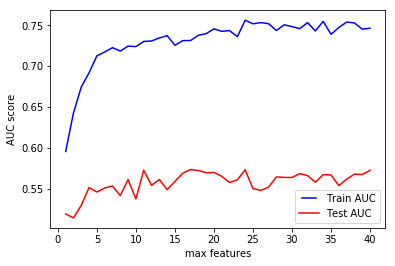

In [701]:
max_features = list(range(1,x_train_scaled.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   gb = GradientBoostingClassifier(max_features=max_feature)
   gb.fit(x_train_scaled, y_train)
   train_pred = gb.predict(x_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = gb.predict(x_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

##### Training Gradient Boosting Trees model and evaluating it

In [844]:
gb_clf2 = GradientBoostingClassifier(n_estimators=31, learning_rate=0.075, max_features=23, max_depth=9, random_state=0).fit(x_train_scaled, y_train)
predictions = gb_clf2.predict(x_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


print("\n\nClassification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[329  64]
 [135  73]]


Classification Report
             precision    recall  f1-score   support

          0       0.71      0.84      0.77       393
          1       0.53      0.35      0.42       208

avg / total       0.65      0.67      0.65       601



In [849]:
print(" Accuracy of train set" + str(gb_clf2.score(x_train_scaled,y_train)))
print(" Accuracy of test set "+ str(gb_clf2.score(x_test_scaled,y_test)))

 Accuracy of train set0.995
 Accuracy of test set 0.6688851913477537


In [737]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5940558328440008

In [738]:
r_probs=[0 for _ in range(len(y_test))]  # for the baseline model, all cases wrong
r_fpr, r_tpr,_=roc_curve(y_test,r_probs)
r_auc=roc_auc_score(y_test, r_probs)

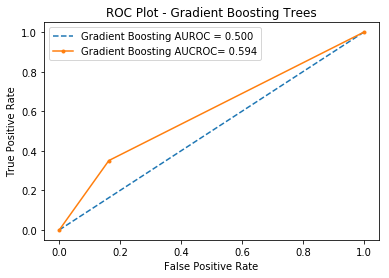

In [739]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Gradient Boosting AUROC = %0.3f'  %r_auc)
plt.plot(false_positive_rate, true_positive_rate, marker='.', label='Gradient Boosting AUCROC= %0.3f'%roc_auc)
plt.title("ROC Plot - Gradient Boosting Trees")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# For the worst case scenario the AUC is 0.5

##### Gradient Boosting - Feature Importance

In [740]:
# Extract feature importances
feature_imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': gb.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
feature_imp.head(10)

,feature,importance
0,CommuteDistance,0.143297
4,Salary,0.130214
6,PerformanceRating,0.119989
3,OvertimeHours,0.119491
2,NumPreviousCompanies,0.097818
7,Job,0.035802
5,TrainingsAttended,0.031211
8,Company,0.027928
9,Work/Life balance,0.027422
37,TravelFrequency_None,0.025831


### Ensemble Scores

In [809]:
gb_pred=gb_clf2.predict(x_test_scaled) #predict the class
gb_prob=pd.DataFrame(gb_clf2.predict_proba(x_test_scaled)) # predict the prob
gb_prob.columns=['Attrition No', 'Attrition Yes']
gb_prob.head(10)

,Attrition No,Attrition Yes
0,0.845684,0.154316
1,0.761380,0.238620
2,0.715592,0.284408
3,0.412044,0.587956
4,0.363007,0.636993
5,0.535680,0.464320
6,0.898715,0.101285
7,0.925417,0.074583
8,0.577665,0.422335
9,0.717354,0.282646


In [822]:
combined=pd.DataFrame((rf_prob['Attrition Yes']*0.5 +gb_prob['Attrition Yes']*0.5))
combined.head()

,Attrition Yes
0,0.202158
1,0.244310
2,0.267204
3,0.543978
4,0.668497


In [837]:
print(combined[combined['Attrition Yes']>0.65])
print('\nTotal number of employees who are likely to leave- ' + str(len(combined[combined['Attrition Yes']>0.65])))

     Attrition Yes
4         0.668497
24        0.762779
72        0.718452
100       0.674587
129       0.661840
167       0.688832
188       0.700672
216       0.765299
219       0.757991
221       0.675093
238       0.660624
307       0.655377
310       0.676659
328       0.654382
335       0.694921
353       0.655673
358       0.656883
368       0.655745
369       0.818205
370       0.667557
399       0.735384
410       0.697442
428       0.670862
447       0.778734
462       0.792665
477       0.669680
483       0.679577
522       0.658250
528       0.650586
600       0.802915

Total number of employees who are likely to leave- 30
